In [2]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
with open('clean_df_final', 'rb') as fh:  # you need to use 'rb' to read
    df = pickle.load(fh)

In [26]:
df.head()

,Title,Description,Stream
0,RPA Developer / Architect,rpa analyst robotic process automation brand n...,Robotic Process Automation
1,Blue Prism RPA Developer/Analyst,one uks leading investment management companie...,Robotic Process Automation
2,Senior RPA Developer,grade band e salary £41739 £49023 closing date...,Robotic Process Automation
3,RPA Developer,grade band salary £29064 £40698 closing date 1...,Robotic Process Automation
4,Senior RPA Developer,robotic process automation developer abacus ca...,Robotic Process Automation


[Text(0, 0, 'Robotic Process Automation'),
 Text(0, 0, 'Testing'),
 Text(0, 0, 'PMO'),
 Text(0, 0, 'Compliance and Risk'),
 Text(0, 0, 'Information Security Management'),
 Text(0, 0, 'Cyber Security'),
 Text(0, 0, 'Business Analysis'),
 Text(0, 0, 'Business Intelligence'),
 Text(0, 0, 'Cloud Computing'),
 Text(0, 0, 'Development'),
 Text(0, 0, 'IT Service Management')]

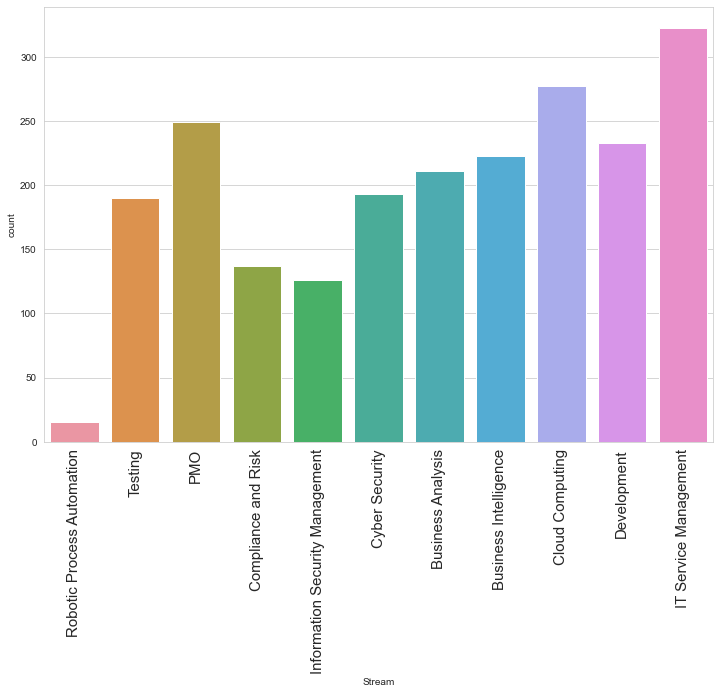

In [27]:
# view how the data is distributed
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
g = sns.countplot(data=df, x='Stream')
g.set_xticklabels(g.get_xticklabels(),rotation=90, fontsize=15)

In [13]:
len(df[df['Stream'] == 'Robotic Process Automation'])

15

## LOGISTIC REGRESSION MODEL >>>>>>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
X= df['Description'].values
y= df['Stream'].values


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=101)

In [31]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [32]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train) # fit the data to a logisticc regression
score = classifier.score(X_test,y_test)
print("Accuracy: ", score)


Accuracy:  0.8577981651376146


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## A simple MultinomialNB Model

In [42]:
X= df['Description']
y= df['Stream'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=101)

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [45]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [46]:
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [47]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = nb.predict(X_test)

In [48]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.5848623853211009


## Keras Model 1 >> Real python

In [49]:
X= df['Description'].values
y= df['Stream']

In [50]:
# Change to binary
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

y = to_categorical(y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=101)

In [52]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [55]:
input_dim = X_train.shape[1]  # Number of features

In [59]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))

In [60]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                197380    
_________________________________________________________________
dense_3 (Dense)              (None, 11)                121       
Total params: 197,501
Trainable params: 197,501
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(X_train, y_train,
                    epochs=200,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=8)

In [72]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9897
Testing Accuracy:  0.7729


In [73]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [74]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


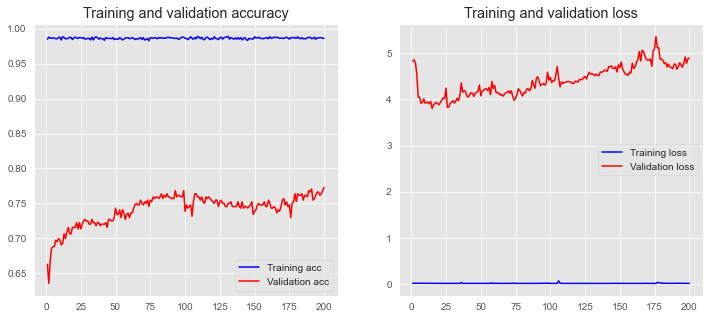

In [75]:
plot_history(history)